In [94]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

sns.set(style="darkgrid")

df = pd.read_csv('data.csv')
df = df.filter(items= ['Diagnosis','Age','BloodPres','FBSugar','Gender','PainType','STPeakSlope'])


aget = pd.crosstab(index=df['Age'], columns=df['Diagnosis'])
bloodt = pd.crosstab(index=df['BloodPres'], columns=df['Diagnosis'])
fbst = pd.crosstab(index=df['FBSugar'], columns=df['Diagnosis'])
gent = pd.crosstab(index=df['Gender'], columns= df['Diagnosis'])
ptt = pd.crosstab(index=df['PainType'], columns=df['Diagnosis'])
stpst = pd.crosstab(index=df['STPeakSlope'], columns=df['Diagnosis'])


<AxesSubplot: xlabel='Age', ylabel='Frequency'>

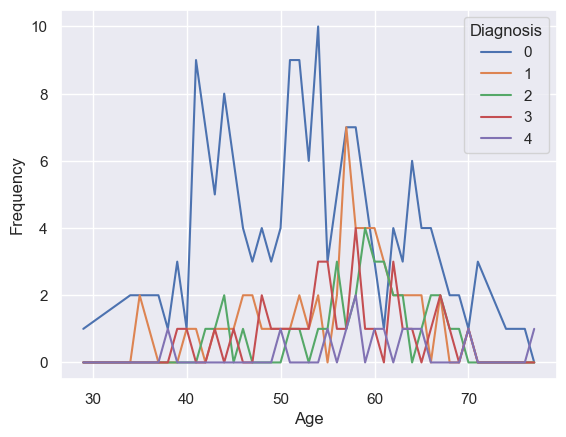

In [95]:
aget.plot(ylabel='Frequency',xlabel='Age')

<AxesSubplot: xlabel='Gender', ylabel='Frequency'>

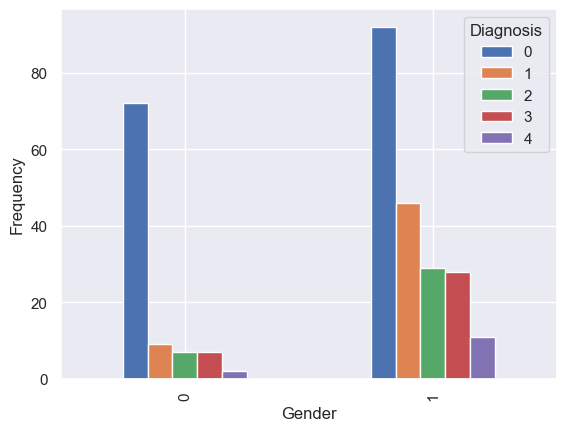

In [96]:
gent.plot.bar(ylabel='Frequency',xlabel='Gender')

<AxesSubplot: xlabel='Pain Type', ylabel='Frequency'>

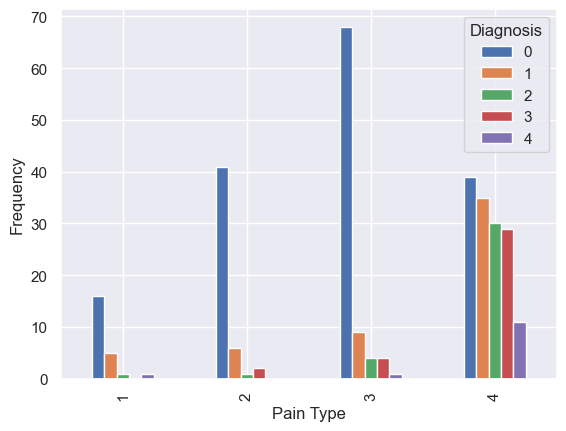

In [97]:
ptt.plot.bar(ylabel='Frequency',xlabel='Pain Type')


<AxesSubplot: xlabel='STPeakSlope', ylabel='Frequency'>

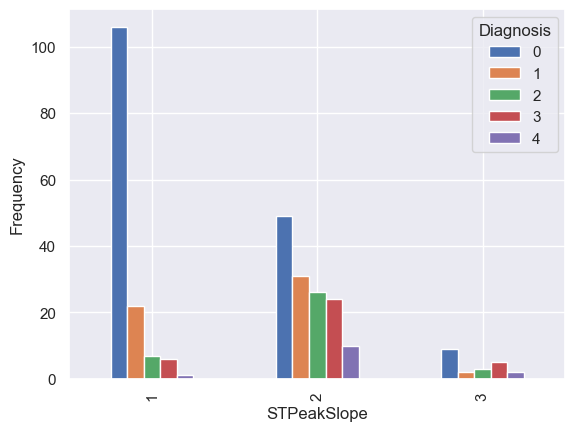

In [98]:
stpst.plot.bar(ylabel='Frequency')


<AxesSubplot: xlabel='Blood Pressre (mm Hg)', ylabel='Frequency'>

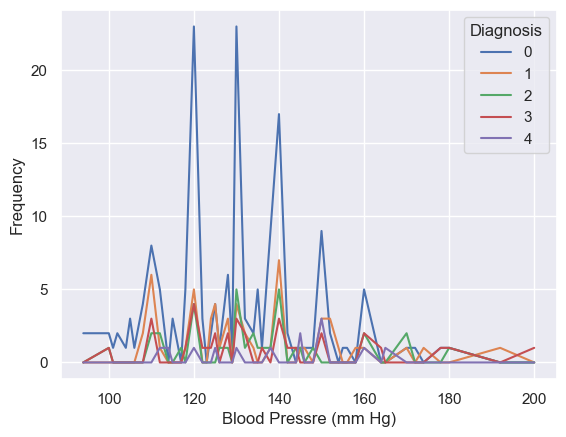

In [99]:
bloodt.plot(ylabel='Frequency',xlabel='Blood Pressre (mm Hg)')


<AxesSubplot: xlabel='FBSugar', ylabel='Frequency'>

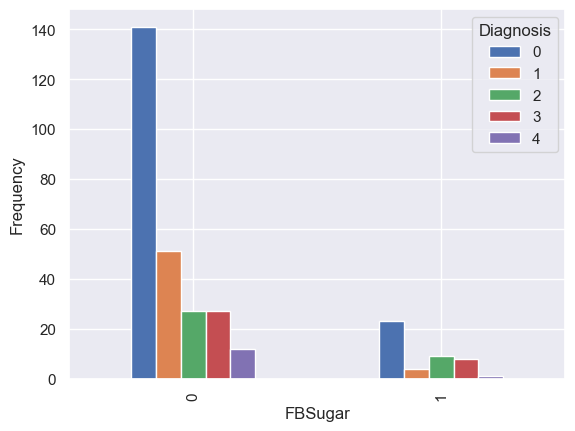

In [100]:
fbst.plot.bar(ylabel='Frequency')

In [101]:
df= pd.get_dummies(df, columns = ['PainType','STPeakSlope'])
df

,Diagnosis,Age,BloodPres,FBSugar,Gender,PainType_1,PainType_2,PainType_3,PainType_4,STPeakSlope_1,STPeakSlope_2,STPeakSlope_3
0,0,63,145,1,1,1,0,0,0,0,0,1
1,2,67,160,0,1,0,0,0,1,0,1,0
2,1,67,120,0,1,0,0,0,1,0,1,0
3,0,37,130,0,1,0,0,1,0,0,0,1
4,0,41,130,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,45,110,0,1,1,0,0,0,0,1,0
299,2,68,144,1,1,0,0,0,1,0,1,0
300,3,57,130,0,1,0,0,0,1,0,1,0
301,1,57,130,0,0,0,1,0,0,0,1,0


In [102]:
X= df.iloc[:,1:11]
Y = df.iloc[:,0] 

In [103]:
best_features= SelectKBest(score_func=chi2, k=3)
fit= best_features.fit(X,Y)
df_scores= pd.DataFrame(fit.scores_)
df_columns= pd.DataFrame(X.columns)
features_scores= pd.concat([df_columns, df_scores], axis=1)
features_scores.columns= ['Features', 'Score']
features_scores.sort_values(by = 'Score')

,Features,Score
4,PainType_1,4.931619
2,FBSugar,6.658223
3,Gender,7.499223
5,PainType_2,16.942450
1,BloodPres,18.870256
6,PainType_3,21.974965
9,STPeakSlope_2,22.408432
0,Age,27.922884
8,STPeakSlope_1,28.232230
7,PainType_4,45.129615


In [104]:
X= df[['PainType_4', 'STPeakSlope_1', 'Age']]
Y = df['Diagnosis']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=100)
logreg= LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print (X_test) #test dataset
print (y_pred) #predicted values

     PainType_4  STPeakSlope_1  Age
69            0              0   46
300           1              0   57
220           0              1   41
134           0              0   43
7             1              1   57
..          ...            ...  ...
254           1              0   43
171           1              1   53
174           1              0   64
42            0              1   71
65            1              0   60

[122 rows x 3 columns]
[0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0
 0 1 0 1 0 0 0 0 1 0 1]


C:\Users\nkoroi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [110]:
from sklearn import metrics
from sklearn.metrics import classification_report
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print('Recall: ',metrics.recall_score(y_test, y_pred, average = None ,zero_division=1))
print("Precision:",metrics.precision_score(y_test, y_pred,average = None , zero_division=1))
print("CL Report:",metrics.classification_report(y_test, y_pred ,zero_division=1))

Accuracy:  0.5245901639344263
Recall:  [0.95       0.33333333 0.         0.         0.        ]
Precision: [0.61290323 0.24137931 1.         1.         1.        ]
CL Report:               precision    recall  f1-score   support

           0       0.61      0.95      0.75        60
           1       0.24      0.33      0.28        21
           2       1.00      0.00      0.00        18
           3       1.00      0.00      0.00        18
           4       1.00      0.00      0.00         5

    accuracy                           0.52       122
   macro avg       0.77      0.26      0.21       122
weighted avg       0.68      0.52      0.41       122

